
## Tech Topics

### Jason Zhao, May 2017

#### Install tensorflow using anaconda 
(ref: https://www.tensorflow.org/install/install_windows)
right now, tf only supports py3.5 on windows (ref: https://github.com/tensorflow/tensorflow/issues/6999)
> $conda create -n tensorflow python=3.5

activate the environment (do this each time before calling jupyter)
> $activate tensorflow

#### install tf
> $pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/windows/cpu/tensorflow-1.1.0-cp35-cp35m-win_amd64.whl

#### install other packages, like jupyter, scipy, numpy, matplotlab, pandas, scikit-learn, seaborn
> $conda install jupyter


#### Note: in terminal, activate the environment first and then open the jupyter notebook

In [1]:
# Install validation
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))



b'Hello, TensorFlow!'


In [1]:
import tensorflow as tf
import matplotlib


#basic tensorflow example

a = tf.constant([1])
b = tf.constant([2])
#c = a + b
c = tf.add(a,b)
with tf.Session() as session:
    result = session.run(c)
    print(result)

    
####################################################
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
from __future__ import absolute_import

from __future__ import division
from __future__ import print_function
import argparse
import sys
from tensorflow.examples.tutorials.mnist import input_data


def softmax_tf():
  # Import data
  mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

  # placeholders
  x = tf.placeholder(tf.float32, shape=[None, 784])
  y_ = tf.placeholder(tf.float32, shape=[None, 10])
  # variables
  W = tf.Variable(tf.zeros([784, 10]))
  b = tf.Variable(tf.zeros([10]))
  y = tf.matmul(x, W) + b

  keras

  # Define loss and optimizer
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
  train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

  sess = tf.InteractiveSession()
  # We must initiate all Variable after launching the graph
  #as we have interactive session, we could do next line this way
  tf.global_variables_initializer().run()
  # Train
  for _ in range(1000):
    batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch[0], y_: batch[1]})

  # Test trained model
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))
  sess.close()

softmax_tf()

[3]
Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.9192


In [11]:
#####################################################3
# Autoencoder w/ tensorflow
# Code modified from Parag K. Mital
# %% Imports
%matplotlib inline
import tensorflow as tf
import numpy as np
import math

In [2]:

# %% Autoencoder definition
def autoencoder(dimensions=[784, 512, 256, 64]):
    """Build a deep autoencoder w/ tied weights.

    Parameters
    ----------
    dimensions : list, optional
        The number of neurons for each layer of the autoencoder.

    Returns
    -------
    x : Tensor
        Input placeholder to the network
    z : Tensor
        Inner-most latent representation
    y : Tensor
        Output reconstruction of the input
    cost : Tensor
        Overall cost to use for training
    """
    # %% input to the network
    x = tf.placeholder(tf.float32, [None, dimensions[0]], name='x')
    current_input = x

    # %% Build the encoder
    encoder = []
    for layer_i, n_output in enumerate(dimensions[1:]):
        n_input = int(current_input.get_shape()[1])
        W = tf.Variable(
            tf.random_uniform([n_input, n_output],
                              -1.0 / math.sqrt(n_input),
                              1.0 / math.sqrt(n_input)))
        b = tf.Variable(tf.zeros([n_output]))
        encoder.append(W)
        output = tf.nn.tanh(tf.matmul(current_input, W) + b)
        current_input = output

    # %% latent representation
    z = current_input
    encoder.reverse()

    # %% Build the decoder using the same weights
    for layer_i, n_output in enumerate(dimensions[:-1][::-1]):
        W = tf.transpose(encoder[layer_i])
        b = tf.Variable(tf.zeros([n_output]))
        output = tf.nn.tanh(tf.matmul(current_input, W) + b)
        current_input = output

    # %% now have the reconstruction through the network
    y = current_input

    # %% cost function measures pixel-wise difference
    cost = tf.reduce_sum(tf.square(y - x))
    return {'x': x, 'z': z, 'y': y, 'cost': cost}




In [14]:
# %% Basic test
def test_mnist():
    """Test the autoencoder using MNIST."""
    import tensorflow as tf
    import tensorflow.examples.tutorials.mnist.input_data as input_data
    # from matplotlib import use
    # use('Agg')
    import matplotlib.pyplot as plt

    # %%
    # load MNIST as before
    mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
    mean_img = np.mean(mnist.train.images, axis=0)
    # each picture is 28*28 img, so 784 is for input layer dimention number
    ae = autoencoder(dimensions=[784, 256, 64])

    # %%
    learning_rate = 0.001
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae['cost'])

    # %%
    # We create a session to use the graph
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    # %%
    # Fit all training data
    batch_size = 50
    n_epochs = 10
    for epoch_i in range(n_epochs):
        for batch_i in range(mnist.train.num_examples // batch_size):
            batch_xs, _ = mnist.train.next_batch(batch_size)
            #train = np.array([img - mean_img for img in batch_xs])
            # no normalization test
            train = batch_xs
            sess.run(optimizer, feed_dict={ae['x']: train})
        print(epoch_i, sess.run(ae['cost'], feed_dict={ae['x']: train}))

    # %%
    # Plot example reconstructions
    n_examples = 15
    test_xs, _ = mnist.test.next_batch(n_examples)
    #test_xs_norm = np.array([img - mean_img for img in test_xs])
    test_xs_norm = test_xs
    recon = sess.run(ae['y'], feed_dict={ae['x']: test_xs_norm})
    fig, axs = plt.subplots(2, n_examples, figsize=(10, 2))
    for example_i in range(n_examples):
        axs[0][example_i].imshow(
            np.reshape(test_xs[example_i, :], (28, 28)))
        axs[1][example_i].imshow(
            np.reshape([recon[example_i, :] + mean_img], (28, 28)))
    fig.show()
    plt.draw()
    
"""
result using normalization
0 1320.28
1 1028.84
2 1169.8
3 1104.82
4 1003.23
5 997.097
6 1129.45
7 1037.69
8 1062.12
9 921.009


result without normalization
0 615.241
1 522.035
2 538.34
3 527.406
4 487.131
5 483.677
6 486.147
7 469.23
8 480.804
9 484.293

"""    

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0 615.241
1 522.035
2 538.34
3 527.406
4 487.131
5 483.677
6 486.147
7 469.23
8 480.804
9 484.293


C:\Users\ZHAOY156\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


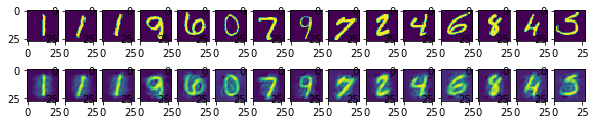

In [15]:

# %%
if __name__ == '__main__':
    test_mnist()

In [25]:
"""
if ae_dimension is [a,b,c,d], then the ae structure will be like:
input_dimension - a - b - c - d - c - b - a - output_dimension

"""
 
def ae_softmax_tf(ae_dimension = [784, 256]):
  # Import data
  mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

  # placeholders
  x = tf.placeholder(tf.float32, shape=[None, ae_dimension[-1]])
  y_ = tf.placeholder(tf.float32, shape=[None, 10])
  # variables
  W = tf.Variable(tf.zeros([ae_dimension[-1], 10]))
  b = tf.Variable(tf.zeros([10]))
  y = tf.matmul(x, W) + b

  # Define loss and optimizer
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
  train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

  sess = tf.InteractiveSession()
  # We must initiate all Variable after launching the graph
  #as we have interactive session, we could do next line this way
  tf.global_variables_initializer().run()
    
      
  # %%
  # each picture is 28*28 img, so 784 is for input layer dimention number
  ae = autoencoder(dimensions=ae_dimension)

  # %%
  learning_rate = 0.001
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae['cost'])

  # %%
  # We create a session to use the graph
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())

  # %%
  # Fit all training data
  batch_size = 50
  n_epochs = 10
  for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
      batch_xs, _ = mnist.train.next_batch(batch_size)
      train = batch_xs
      sess.run(optimizer, feed_dict={ae['x']: train})
      #print(epoch_i, sess.run(ae['cost'], feed_dict={ae['x']: train}))
    
  # Train
  for _ in range(1000):
    batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: sess.run(ae['z'], feed_dict={ae['x']: batch[0]}), y_: batch[1]})

  # Test trained model
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print(sess.run(accuracy, feed_dict={x: sess.run(ae['z'], feed_dict={ae['x']: mnist.test.images}),
                                      y_: mnist.test.labels}))
  sess.close()

ae_softmax_tf([784, 256])

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.92


In [5]:
"""
if ae_dimension is [a,b,c,d], then the ae structure will be like:
input_dimension - a - b - c - d - c - b - a - output_dimension

"""
import tensorflow as tf
import numpy as np
import math
from tensorflow.examples.tutorials.mnist import input_data




def sparse_ae_softmax_tf(ae_dimension = [784, 256]):
  # parameters
  RHO = tf.constant(0.1)
  BETA = tf.constant(3.)  
  ae_batch_size = 50 
  # Import data
  mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

  # placeholders
  x = tf.placeholder(tf.float32, shape=[None, ae_dimension[-1]])
  y_ = tf.placeholder(tf.float32, shape=[None, 10])
  # variables
  W = tf.Variable(tf.zeros([ae_dimension[-1], 10]))
  b = tf.Variable(tf.zeros([10]))
  y = tf.matmul(x, W) + b

  # Define loss and optimizer
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
  train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

  sess = tf.InteractiveSession()
  # We must initiate all Variable after launching the graph
  #as we have interactive session, we could do next line this way
  tf.global_variables_initializer().run()
    
      
  # %%
  # each picture is 28*28 img, so 784 is for input layer dimention number
  ae = autoencoder(dimensions=ae_dimension)
  # maybe need to modify
  rho_hat = tf.div(tf.reduce_sum(ae['z'],0),tf.constant(float(ae_batch_size)))
  def logfunc(x, x2):
        return tf.scalar_mul(x, tf.log(tf.div(x,x2)))
  def KL_Div(rho, rho_hat):
    invrho = tf.subtract(tf.constant(1.), rho)
    invrhohat = tf.subtract(tf.constant(1.), rho_hat)
    logrho = tf.add(logfunc(rho,rho_hat), logfunc(invrho, invrhohat))
    return logrho   
  cost_sparse = tf.scalar_mul(BETA,  tf.reduce_sum(KL_Div(RHO, rho_hat)))
  cost = tf.add(ae['cost'], cost_sparse)
    
  # %%
  learning_rate = 0.001
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

  # %%
  # We create a session to use the graph
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())

  # %%
  # Fit all training data
  batch_size = ae_batch_size
  n_epochs = 10
  for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
      batch_xs, _ = mnist.train.next_batch(batch_size)
      train = batch_xs
      sess.run(optimizer, feed_dict={ae['x']: train})
      #print(epoch_i, sess.run(ae['cost'], feed_dict={ae['x']: train}))
    
  # Train
  for _ in range(1000):
    batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: sess.run(ae['z'], feed_dict={ae['x']: batch[0]}), y_: batch[1]})

  # Test trained model
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print(sess.run(accuracy, feed_dict={x: sess.run(ae['z'], feed_dict={ae['x']: mnist.test.images}),
                                      y_: mnist.test.labels}))
  sess.close()

sparse_ae_softmax_tf([784, 256])

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.9327


In [7]:
"""
if ae_dimension is [a,b,c,d], then the ae structure will be like:
input_dimension - a - b - c - d - c - b - a - output_dimension

"""
import tensorflow as tf
import numpy as np
import math
from tensorflow.examples.tutorials.mnist import input_data




def sparse_ae_softmax_tf(ae_dimension = [784, 256]):
  # parameters
  RHO = tf.constant(0.2)
  BETA = tf.constant(3.)  
  ae_batch_size = 50 
  # Import data
  mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

  # placeholders
  x = tf.placeholder(tf.float32, shape=[None, ae_dimension[-1]])
  y_ = tf.placeholder(tf.float32, shape=[None, 10])
  # variables
  W = tf.Variable(tf.zeros([ae_dimension[-1], 10]))
  b = tf.Variable(tf.zeros([10]))
  y = tf.matmul(x, W) + b

  # Define loss and optimizer
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
  train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

  sess = tf.InteractiveSession()
  # We must initiate all Variable after launching the graph
  #as we have interactive session, we could do next line this way
  tf.global_variables_initializer().run()
    
      
  # %%
  # each picture is 28*28 img, so 784 is for input layer dimention number
  ae = autoencoder(dimensions=ae_dimension)
  # maybe need to modify
  rho_hat = tf.div(tf.reduce_sum(ae['z'],0),tf.constant(float(ae_batch_size)))
  def logfunc(x, x2):
        return tf.scalar_mul(x, tf.log(tf.div(x,x2)))
  def KL_Div(rho, rho_hat):
    invrho = tf.subtract(tf.constant(1.), rho)
    invrhohat = tf.subtract(tf.constant(1.), rho_hat)
    logrho = tf.add(logfunc(rho,rho_hat), logfunc(invrho, invrhohat))
    return logrho   
  cost_sparse = tf.scalar_mul(BETA,  tf.reduce_sum(KL_Div(RHO, rho_hat)))
  cost = tf.add(ae['cost'], cost_sparse)
    
  # %%
  learning_rate = 0.001
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

  # %%
  # We create a session to use the graph
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())

  # %%
  # Fit all training data
  batch_size = ae_batch_size
  n_epochs = 10
  for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
      batch_xs, _ = mnist.train.next_batch(batch_size)
      train = batch_xs
      sess.run(optimizer, feed_dict={ae['x']: train})
      #print(epoch_i, sess.run(ae['cost'], feed_dict={ae['x']: train}))
    
  # Train
  for _ in range(1000):
    batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: sess.run(ae['z'], feed_dict={ae['x']: batch[0]}), y_: batch[1]})

  # Test trained model
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print(sess.run(accuracy, feed_dict={x: sess.run(ae['z'], feed_dict={ae['x']: mnist.test.images}),
                                      y_: mnist.test.labels}))
  sess.close()

sparse_ae_softmax_tf([784, 256])

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.9355


In [20]:
"""
if ae_dimension is [a,b,c,d], then the ae structure will be like:
input_dimension - a - b - c - d - c - b - a - output_dimension

"""
import tensorflow as tf
import numpy as np
import math
from tensorflow.examples.tutorials.mnist import input_data




def sparse_ae_softmax_tf(ae_dimension = [784, 256]):
  # parameters
  RHO = tf.constant(0.1)
  BETA = tf.constant(3.)  
  ae_batch_size = 50 
  # Import data
  mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

  # placeholders
  x = tf.placeholder(tf.float32, shape=[None, ae_dimension[-1]])
  y_ = tf.placeholder(tf.float32, shape=[None, 10])
  # variables
  W = tf.Variable(tf.zeros([ae_dimension[-1], 10]))
  b = tf.Variable(tf.zeros([10]))
  y = tf.matmul(x, W) + b

  # Define loss and optimizer
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
  train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

  sess = tf.InteractiveSession()
  # We must initiate all Variable after launching the graph
  #as we have interactive session, we could do next line this way
  tf.global_variables_initializer().run()
    
      
  # %%
  # each picture is 28*28 img, so 784 is for input layer dimention number
  ae = autoencoder(dimensions=ae_dimension)
  # maybe need to modify
  rho_hat = tf.div(tf.reduce_sum(ae['z'],0),tf.constant(float(ae_batch_size)))
  def logfunc(x, x2):
        return tf.scalar_mul(x, tf.log(tf.div(x,x2)))
  def KL_Div(rho, rho_hat):
    invrho = tf.subtract(tf.constant(1.), rho)
    invrhohat = tf.subtract(tf.constant(1.), rho_hat)
    logrho = tf.add(logfunc(rho,rho_hat), logfunc(invrho, invrhohat))
    return logrho   
  cost_sparse = tf.scalar_mul(BETA,  tf.reduce_sum(KL_Div(RHO, rho_hat)))
  cost = tf.add(ae['cost'], cost_sparse)
    
  # %%
  learning_rate = 0.001
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

  # %%
  # We create a session to use the graph
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())

  # %%
  # Fit all training data
  batch_size = ae_batch_size
  n_epochs = 10
  for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
      batch_xs, _ = mnist.train.next_batch(batch_size)
      train = batch_xs
      sess.run(optimizer, feed_dict={ae['x']: train})
      #print(epoch_i, sess.run(ae['cost'], feed_dict={ae['x']: train}))
    
  # Train
  for _ in range(1000):
    batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: sess.run(ae['z'], feed_dict={ae['x']: batch[0]}), y_: batch[1]})

  # Test trained model
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print(sess.run(accuracy, feed_dict={x: sess.run(ae['z'], feed_dict={ae['x']: mnist.test.images}),
                                      y_: mnist.test.labels}))
  sess.close()

sparse_ae_softmax_tf([784, 128, 64])

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.9043


### Multi-task learning and Keras



* backend is better to be set tensorflow (faster than theano), but backend setting for anaconda + keras is little bit different, as anaconda has its own file overiding the setting of keras.
* in windows, X:\Anaconda3\envs\tensorflow\etc\conda\activate.d\keras_activate.bat:
> set "KERAS_BACKEND=tensorflow"

* in mac, check: https://stackoverflow.com/questions/43327464/how-to-make-keras-use-tensorflow-backend-in-anaconda



#### references 
* regularization: https://chatbotslife.com/regularization-in-deep-learning-f649a45d6e0
* CNN: http://cs231n.github.io/
* multi-task learning: http://sebastianruder.com/multi-task/
* keras API: https://keras.io/getting-started/functional-api-guide/







In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

C:\Users\ZHAOY156\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


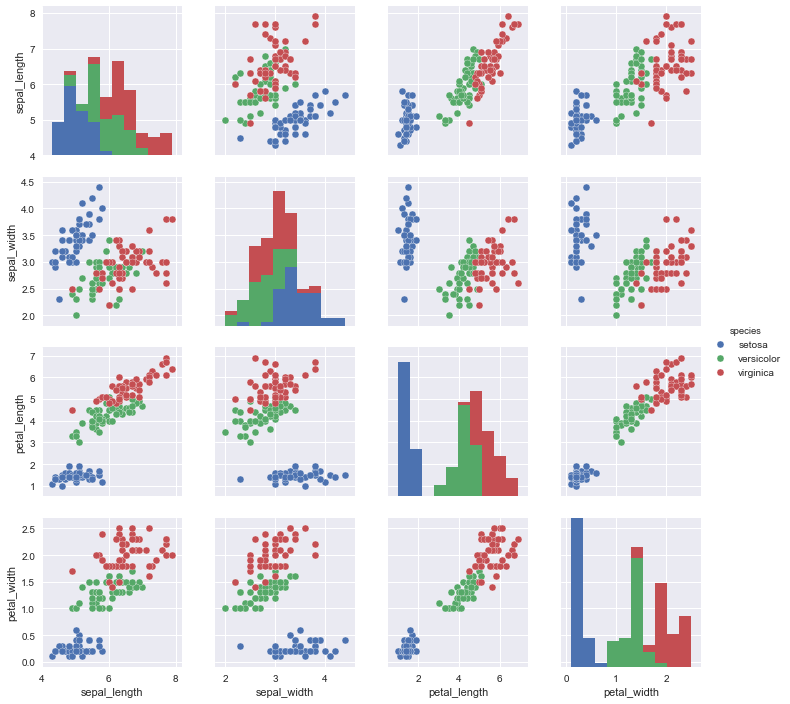

In [3]:
sns.pairplot(iris, hue='species');

In [3]:

X = iris.values[:, :4]
y = iris.values[:, 4]
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, random_state=0)
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)
("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

NameError: name 'iris' is not defined

In [6]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)
model = Sequential()

model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(train_X, train_y_ohe, nb_epoch=100, batch_size=1, verbose=0);
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

NameError: name 'train_y' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)


for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

model.fit(X_train, Y_train,
          batch_size=128, epochs=10,verbose=1)

score = model.evaluate(X_test, Y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Using TensorFlow backend.


X_train original shape (60000, 28, 28)
y_train original shape (60000,)
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)
Epoch 1/10
60000/60000 [==============================] - 24s - loss: 0.2475 - acc: 0.9269    
Epoch 2/10
60000/60000 [==============================] - 24s - loss: 0.0996 - acc: 0.9689    - ETA: 0s - loss: 0.0999 - acc: 0.
Epoch 3/10
60000/60000 [==============================] - 24s - loss: 0.0702 - acc: 0.9783    
Epoch 4/10
60000/60000 [==============================] - 22s - loss: 0.0560 - acc: 0.9816    
Epoch 5/10
60000/60000 [==============================] - 24s - loss: 0.0464 - acc: 0.9848    
Epoch 6/10
60000/60000 [==============================] - 24s - loss: 0.0394 - acc: 0.9870    
Epoch 7/10
60000/60000 [==============================] - 23s - loss: 0.0353 - acc: 0.9884    
Epoch 8/10
60000/60000 [==============================] - 25s - loss: 0.0292 - acc: 0.9905    
Epoch 9/10
60000/60000 [==============================] - 23s - lo

 9888/10000 [============================>.] - ETA: 0s

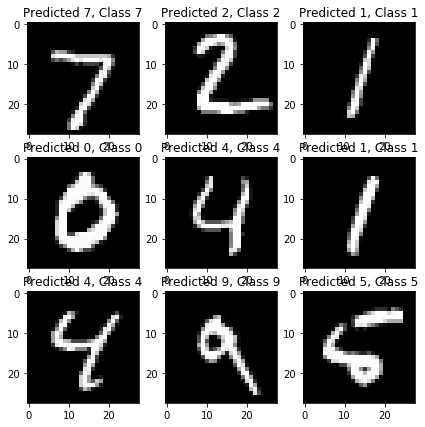

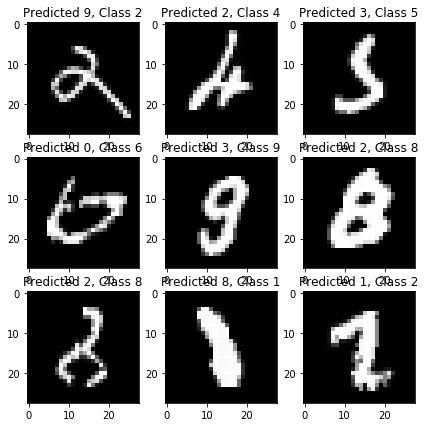

In [21]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.show()

### Multi-task learning

Keras with the TensorFlow backend can easily do this. The functional API was designed for these use cases. 
Here is an LSTM example that shared layers, taken from the guide below:
https://keras.io/getting-started/functional-api-guide/


When you train a Keras model with multiple outputs, you can define a loss function for each output, and Keras will optimize over the sum of all losses, which is pretty useful.

TF example:
https://github.com/jg8610/multi-task-part-1-notebook/blob/master/Multi-Task%20Learning%20Tensorflow%20Part%201.ipynb

In [ ]:
# this layer can take as input a matrix
# and will return a vector of size 64
shared_lstm = LSTM(64)

# when we reuse the same layer instance
# multiple times, the weights of the layer
# are also being reused
# (it is effectively *the same* layer)
encoded_a = shared_lstm(tweet_a)
encoded_b = shared_lstm(tweet_b)

# we can then concatenate the two vectors:
merged_vector = merge([encoded_a, encoded_b], mode='concat', concat_axis=-1)

# and add a logistic regression on top
predictions = Dense(1, activation='sigmoid')(merged_vector)

# we define a trainable model linking the
# tweet inputs to the predictions
model = Model(input=[tweet_a, tweet_b], output=predictions)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit([data_a, data_b], labels, nb_epoch=10)

### Multiple output and input

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)




auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)


auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2})

# And trained it via:
model.fit({'main_input': headline_data, 'aux_input': additional_data},
          {'main_output': labels, 'aux_output': labels},
          epochs=50, batch_size=32)

### Omnigenic Model

* Some references:
    + http://www.plengegen.com/blog/omnigenic/
    + http://www.sciencedirect.com/science/article/pii/S0092867417306293
* Architecture:
    + NN with input being genotypes and outpur layer being phenotypes
    + Autoencoder with input and output layers being the same: combination of genotypes and phenotypes
    + Find low-dimensional embedding that captures correlations between genotypes and phenotypes, within genotypes and within phenotypes
    + Visualize low-diemensional embedding
    + Will use Keras

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.datasets import mnist
from keras.callbacks import TensorBoard


from sklearn import manifold, datasets
from matplotlib import offsetbox

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


# final model
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


# compile
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



# prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)



# train
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s - loss: 0.3387 - val_loss: 0.2639
Epoch 2/100
60000/60000 [==============================] - 6s - loss: 0.2589 - val_loss: 0.2520
Epoch 3/100
60000/60000 [==============================] - 5s - loss: 0.2393 - val_loss: 0.2281
Epoch 4/100
60000/60000 [==============================] - 5s - loss: 0.2219 - val_loss: 0.2137
Epoch 5/100
60000/60000 [==============================] - 6s - loss: 0.2081 - val_loss: 0.1999
Epoch 6/100
60000/60000 [==============================] - 6s - loss: 0.1980 - val_loss: 0.1929
Epoch 7/100
60000/60000 [==============================] - 6s - loss: 0.1916 - val_loss: 0.1871
Epoch 8/100
60000/60000 [==============================] - 6s - loss: 0.1859 - val_loss: 0.1808
Epoch 9/100
60000/60000 [==============================] - 6s - loss: 0.1794 - val_loss: 0.1757
Epoch 10/100
60000/60000 [==============================] - 

60000/60000 [==============================] - 5s - loss: 0.1042 - val_loss: 0.1030
Epoch 85/100
60000/60000 [==============================] - 5s - loss: 0.1040 - val_loss: 0.1035
Epoch 86/100
60000/60000 [==============================] - 5s - loss: 0.1039 - val_loss: 0.1032
Epoch 87/100
60000/60000 [==============================] - 5s - loss: 0.1037 - val_loss: 0.1034
Epoch 88/100
60000/60000 [==============================] - 5s - loss: 0.1035 - val_loss: 0.1019
Epoch 89/100
60000/60000 [==============================] - 5s - loss: 0.1033 - val_loss: 0.1030
Epoch 90/100
60000/60000 [==============================] - 5s - loss: 0.1031 - val_loss: 0.1017
Epoch 91/100
60000/60000 [==============================] - 5s - loss: 0.1029 - val_loss: 0.1025
Epoch 92/100
60000/60000 [==============================] - 5s - loss: 0.1029 - val_loss: 0.1033
Epoch 93/100
60000/60000 [==============================] - 5s - loss: 0.1026 - val_loss: 0.1011
Epoch 94/100
60000/60000 [=================

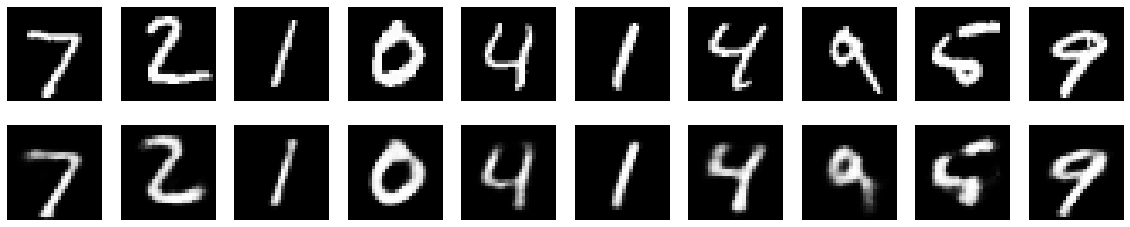

In [28]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

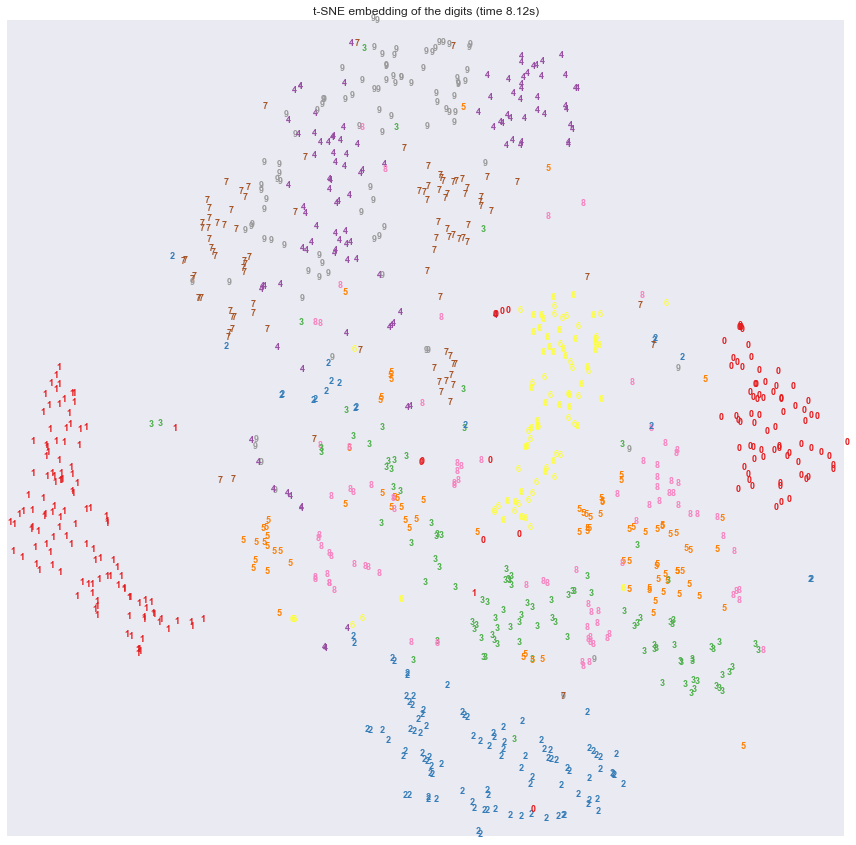

In [53]:
# Scale and visualize the embedding vectors
def plot_embedding(X,y,title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15,15))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

X = encoded_imgs[1:1000,:]
color = y_test[1:1000]
n_components = 2
t0 = time()

tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
plot_embedding(Y,color,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()